# Regression Tree Execise 

## Imports

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

## Load Data

In [4]:
path = r"C:\Users\kdelfino\Documents\GitHub\Regression-Tree-Exercise\cali_housing.csv"
df = pd.read_csv(path)

## Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
##check for duplicate data
df.duplicated().sum()

0

- Dataset is `Cleaned` and will be used `as-is` 

## Preprocessing

## Train Test Split (Model Validation)

In [12]:
target = df["MedHouseVal"]
X = df.drop(columns="MedHouseVal")
y = target

X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=42)

## Instantiate and Fit model

In [14]:
#create Decision tree object
dec_tree = DecisionTreeRegressor(random_state=42)

In [15]:
# training model
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## Evaluate the Model

In [17]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.600578011919574


In [20]:
#checking for options to tune this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [21]:
#check max depth of the model
dec_tree.get_depth()

36

In [22]:
#check how many leaf nodes
dec_tree.get_n_leaves()

14841

In [41]:
#creating loop to test our model with different depths 
depths = list(range(2,36))
scores = pd.DataFrame(index= depths, columns= ["Test Score","Train Score"])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_train, y_train)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth,"Train Score"] = train_score
    scores.loc[depth,"Test Score"] = test_score

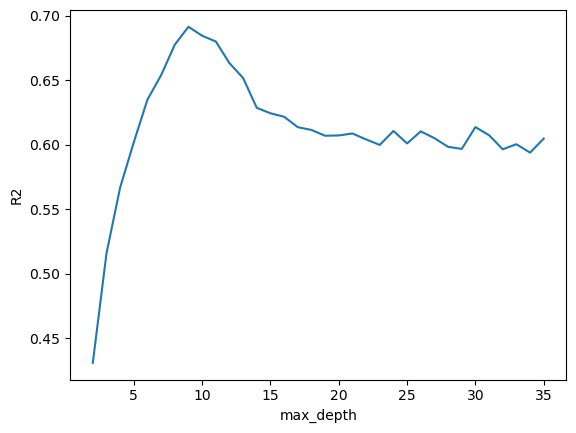

In [34]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');


In [42]:
scores.sort_values(by="Test Score", ascending=False).head()

,Test Score,Train Score
9,0.691342,0.796167
10,0.684413,0.832209
11,0.679933,0.867597
8,0.677491,0.755168
12,0.663138,0.898104


In [56]:
print(f"the optimal max depth for our model is {scores[scores['Test Score']== scores['Test Score'].max()].index[0]}")

the optimal max depth for our model is 9


In [58]:
#train and check score with the most optimal depth
dec_tree = DecisionTreeRegressor(max_depth= 9, random_state=42)
dec_tree.fit(X_train, y_train)
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.7961670169616584
0.6913416719998345
